# Tables, Graphs, and Reports

## Configure

There are many libraries in these fields; however, we will restrict the scope to plotnine, which is a python implementation of R's ggplot2.

We will be using data from the Titanic disaster for demonstration.  Each record is of a passenger and descriptive information. Take a look at the [paper](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf) for more details on these variables.  

For other quick datasets, see [the data](https://github.com/mwaskom/seaborn-data) that come with the python seaborn module.

In [2]:
import pandas as pd
import numpy as np

In [28]:
import seaborn as sns
import plotnine as p9

Most of these fields are self-explanatory, to be sure, 'pclass' is passenger class, 'name' is title and family names, 'sibsp' is number of siblings/spouses aboard, 'parch' is number of parents/children aboard, 'ticket' is ticket number, 'fare' is passenger fare (British Pound), 'cabin' location, 'embarked' is port of embarkation (Cherbourg, Queenstown, Southampton), and 'boat' is which lifeboat they entered (with many missing values for those who did not get a seat).

In [20]:
table_url = 'https://raw.githubusercontent.com/alexisperrier/packt-aml/master/ch4/extended_titanic.csv'
df = pd.read_csv(table_url)
df.shape

(1309, 19)

In [21]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,is_age_missing,log_fare,title,deck,family_size
0,3,1,de Mulder Mr. Theodore,male,30.0,0,0,345774,9.500,NaN,S,11,NaN,Belgium Detroit MI,1,3.392317,Mulder,NaN,1
1,3,0,Edvardsson Mr. Gustaf Hjalmar,male,18.0,0,0,349912,7.775,NaN,S,NaN,NaN,Tofta Sweden Joliet IL,1,3.133399,Mr.,NaN,1
2,2,0,Veal Mr. James,male,40.0,0,0,28221,13.000,NaN,S,NaN,NaN,Barre Co Washington VT,1,3.807355,Mr.,NaN,1


## Tables

Cross tabulation in pandas is very accessible.  Below is the simple case with just two categorical variables: survived vs ticket class.

In [7]:
pd.crosstab(df.survived, df.pclass, 
            margins=True
            )

pclass,1,2,3,All
survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


These counts can be `normalized` as a percentage of the totals; hence, the lower-right corner value is 100% when `margins` are included.

We can also scope normalization to just the `rows` / `columns`.

In [18]:
pd.crosstab(df.survived, df.pclass, 
            margins=True,
            normalize=True
            ).round(3)*100

pclass,1,2,3,All
survived,,,,
0,9.0,10.9,41.8,61.6
1,15.3,9.8,13.4,38.4
All,24.2,20.7,55.1,100.0


In [22]:
pd.crosstab(df.survived, df.pclass, 
            margins=True,
            normalize='columns'
            ).round(3)*100

pclass,1,2,3,All
survived,,,,
0,38.1,57.0,74.5,61.8
1,61.9,43.0,25.5,38.2


Instead of using count data, another metric can be used with a descriptive statistic.  Here, the `median` is applied to the price of the ticket across the categories.  It seems the price paid did influence outcome of survival.

In [25]:
pd.crosstab(df.survived, df.pclass, 
            values=df.fare, 
            aggfunc='median'
            ).round(0)

pclass,1,2,3
survived,,,
0,50.0,13.0,8.0
1,77.0,23.0,8.0


You can improve the sophistication by grouping factors.  Here, we group the place of embarkation with the passengers' class.  Interestingly, fare price did not seem to influence survival of those from Queensland.

In [31]:
pd.crosstab(df.survived, [df.embarked, df.pclass], 
            values=df.fare, 
            aggfunc='median',
            colnames=['Emarkation City', "Class"],
            dropna=False
            ).round(0)

Emarkation City     C                 Q                S           
Class               1     2     3     1     2    3     1     2    3
survived                                                           
0                73.0  15.0   7.0  90.0  12.0  8.0  42.0  13.0  8.0
1                79.0  19.0  13.0  90.0  12.0  8.0  57.0  23.0  9.0

When the table gets larger, it becomes increasingly difficult to assess numbers.  Instead, you may want to use seaborn's heatmap which accepts crosstab's resulting DataFrame, directly.

In [39]:
ct = pd.crosstab([df.sex, df.survived], [df.embarked, df.pclass], 
                 values=df.fare, 
                 aggfunc='median',
                 colnames=['Emarkation City', "Class"],
                 dropna=False
                 ).round(0)
ct

Emarkation City     C                 Q                 S            
Class               1     2     3     1     2    3      1     2     3
sex    survived                                                      
female 0         30.0   NaN  14.0   NaN   NaN  8.0  152.0  21.0  16.0
       1         83.0  28.0  15.0  90.0  12.0  8.0   78.0  23.0  11.0
male   0         75.0  15.0   7.0  90.0  12.0  8.0   38.0  13.0   8.0
       1         57.0  14.0  11.0   NaN   NaN  8.0   30.0  19.0   8.0

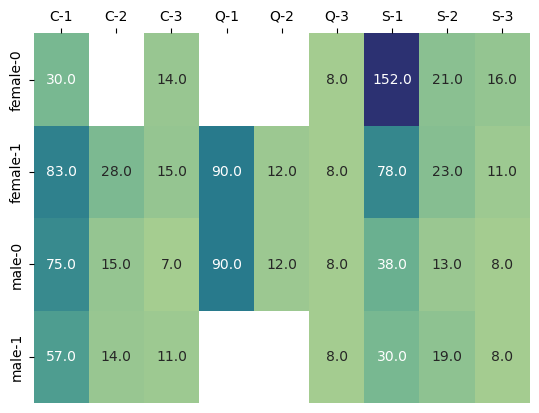

In [44]:
ax = sns.heatmap(ct, 
            cmap="crest", 
            annot=True, 
            cbar=False,
            fmt=".1f"
            )
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

Using the `.styling` method can greatly improve the quality of output.  The following highlights the maximum value of the table and returns the entire table in HTML.  This can be displayed directly in Jupyter.

The highest median fare paid was for women from Southampton with a 1st class ticket, who, strangely, did not survive.

In [61]:
from IPython.display import display, HTML

In [67]:
s = ct.style.highlight_max(axis=None, props='background-color:darkred; font-weight:bold;')
display(HTML( s.to_html() ))

## Graphs

## Reports

Pandas (with XlsxWriter library) allows us to make an Excel sheet with graphs and other Excel functionality.  We need to define the type of the chart (line chart in our example) and the data series for the chart (the data series needs to be in the Excel spreadsheet).

In [ ]:
report_name = 'example_report.xlsx'
sheet_name = 'Sheet1'
writer = pd.ExcelWriter(report_name, engine='xlsxwriter')
df.to_excel(writer, sheet_name=sheet_name, index=False)
# writer.save()

# define the workbook
workbook = writer.book
worksheet = writer.sheets[sheet_name]
# create a chart line object
chart = workbook.add_chart({'type': 'line'})
# configure the series of the chart from the spreadsheet
# using a list of values instead of category/value formulas:
#     [sheetname, first_row, first_col, last_row, last_col]
chart.add_series({
    'categories': [sheet_name, 1, 0, 3, 0],
    'values':     [sheet_name, 1, 1, 3, 1],
})
# configure the chart axes
chart.set_x_axis({'name': 'Index', 'position_axis': 'on_tick'})
chart.set_y_axis({'name': 'Value', 'major_gridlines': {'visible': False}})
# place the chart on the worksheet
worksheet.insert_chart('E2', chart)
# output the excel file
writer.save()